Saving Iris.csv to Iris (1).csv

Dataset Loaded Successfully ✓
Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



--- DATASET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

--- STATISTICS ---
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.

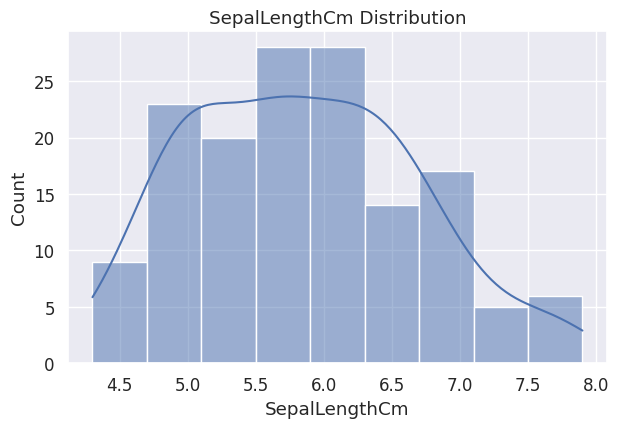

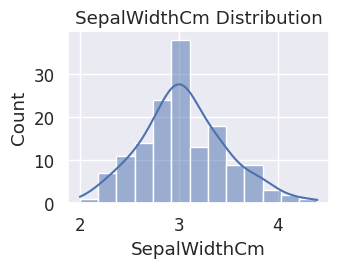

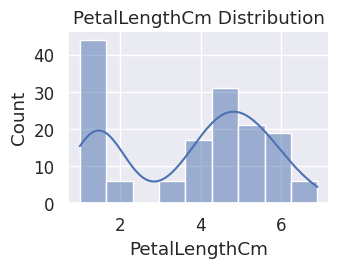

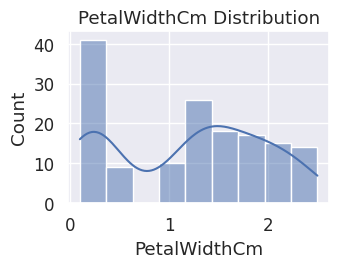

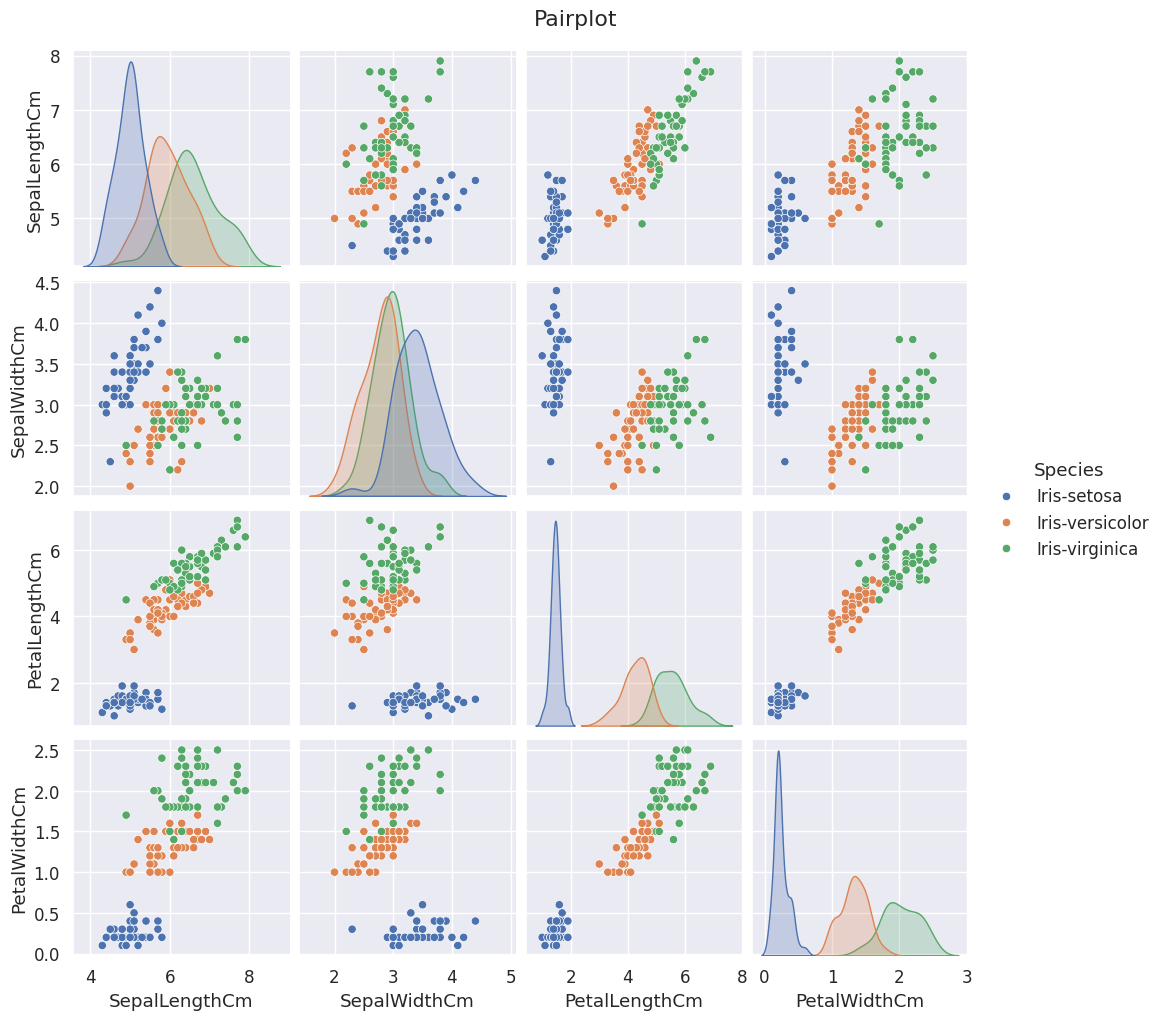

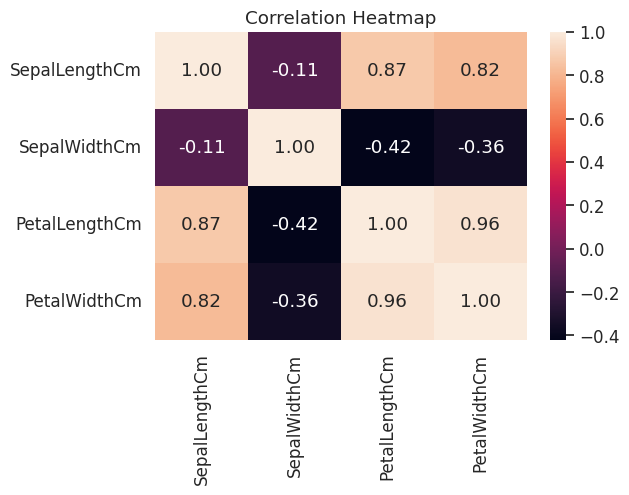

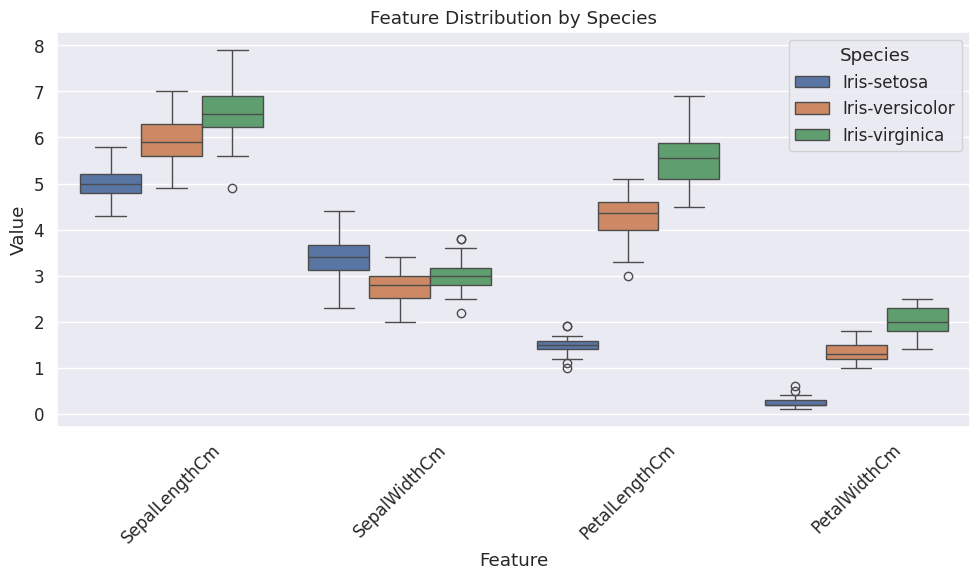


Train/Test Shapes: (120, 4) (30, 4)

Performing Cross Validation...
Logistic Regression: 0.9583 (+/- 0.0264)
KNN: 0.9667 (+/- 0.0312)
SVM RBF: 0.9667 (+/- 0.0312)
Random Forest: 0.9500 (+/- 0.0167)


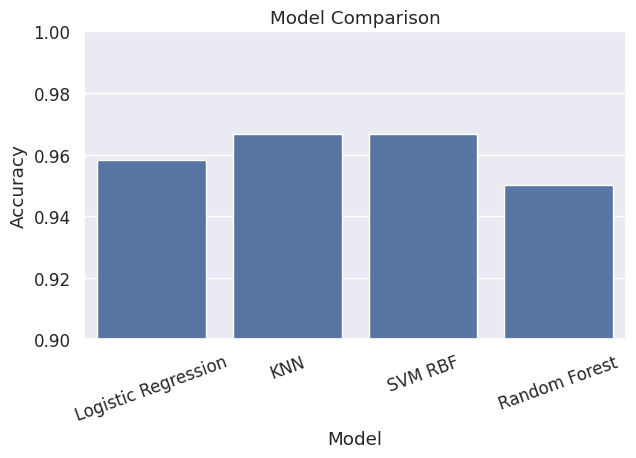


Best Model: KNN

Test Accuracy (KNN): 0.9333

--- CLASSIFICATION REPORT ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



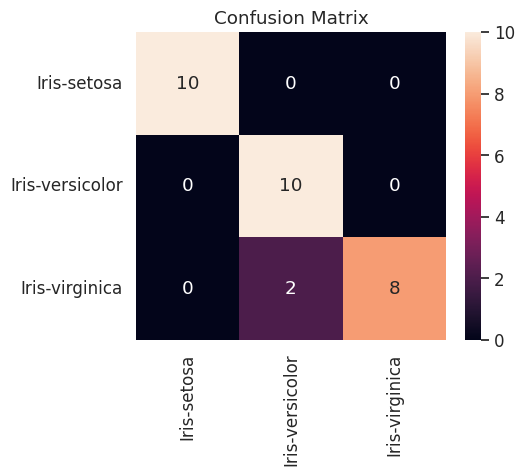


Example Prediction (5.1,3.5,1.4,0.2): Iris-setosa

Model Saved Successfully ✓


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
# ============================================================
# IRIS FLOWER CLASSIFICATION – FULL COLAB CODE (ERROR-FREE)
# ============================================================

# ===================== 0. UPLOAD DATASET =====================

from google.colab import files
uploaded = files.upload()

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib

# plt.style.use("seaborn-whitegrid") # Removed this line as it caused an error
sns.set(font_scale=1.1)

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("\nDataset Loaded Successfully ✓")
print("Shape:", df.shape)
display(df.head())

# ===================== 1. DATA INFORMATION ====================

print("\n--- DATASET INFO ---")
print(df.info())

print("\n--- STATISTICS ---")
print(df.describe())

print("\n--- MISSING VALUES ---")
print(df.isna().sum())

if "Id" in df.columns:
    df = df.drop(columns=["Id"])
    print("\nRemoved 'Id' column.")

    # ===================== 2. VISUALIZATIONS ======================

    print("\nCreating Visualizations...")

    num_cols = df.columns[:-1]

    plt.figure(figsize=(12, 8))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], kde=True)
        plt.title(f"{col} Distribution")
        plt.tight_layout()
        plt.show()

    sns.pairplot(df, hue="Species")
    plt.suptitle("Pairplot", y=1.02)
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.heatmap(df.drop(columns=["Species"]).corr(), annot=True, fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    plt.figure(figsize=(10, 6))
    melt = df.melt(id_vars="Species", var_name="Feature", value_name="Value")
    sns.boxplot(data=melt, x="Feature", y="Value", hue="Species")
    plt.title("Feature Distribution by Species")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ===================== 3. DATA PREPROCESSING ==================

X = df.drop(columns=["Species"])
y = df["Species"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("\nTrain/Test Shapes:", X_train.shape, X_test.shape)

# ===================== 4. MODEL DEFINITIONS ===================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM RBF": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42)
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([("scaler", StandardScaler()), ("clf", model)])

# ===================== 5. CROSS-VALIDATION ====================

print("\nPerforming Cross Validation...")

cv_scores = {}
for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    cv_scores[name] = scores
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

cv_df = pd.DataFrame({
    "Model": list(cv_scores.keys()),
    "Accuracy": [cv_scores[m].mean() for m in cv_scores]
})

plt.figure(figsize=(7, 4))
sns.barplot(data=cv_df, x="Model", y="Accuracy")
plt.title("Model Comparison")
plt.ylim(0.9, 1.0)
plt.xticks(rotation=20)
plt.show()

best_model_name = cv_df.sort_values("Accuracy", ascending=False).iloc[0]["Model"]
best_pipeline = pipelines[best_model_name]

print("\nBest Model:", best_model_name)

# ===================== 6. TRAIN & TEST BEST MODEL ============

best_pipeline.fit(X_train, y_train)
pred = best_pipeline.predict(X_test)

acc = accuracy_score(y_test, pred)
print(f"\nTest Accuracy ({best_model_name}): {acc:.4f}")

print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, pred, target_names=le.classes_))

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.show()

# ===================== 7. PREDICTION FUNCTION ================

def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    encoded = best_pipeline.predict(sample)[0]
    return le.inverse_transform([encoded])[0]

print("\nExample Prediction (5.1,3.5,1.4,0.2):", predict_species(5.1, 3.5, 1.4, 0.2))

# ===================== 8. SAVE MODEL =========================

joblib.dump(best_pipeline, "iris_best_model.joblib")
joblib.dump(le, "iris_label_encoder.joblib")

print("\nModel Saved Successfully ✓")
